In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import torch as th
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline

def softmax(x, beta=1.0, dim=0):
    sc = beta * x
    return th.nn.functional.softmax(sc, dim=dim)

def softmax_entropy(x, beta=1.0, dim=1):
    p = softmax(x, beta=beta, dim=dim)
    logp = th.log2(p)
    h = th.sum(-p*logp)
    return h

# Q-entropy: Atari

## Load Obs

In [2]:
import baselines
with open("data/obs/obs_pongv4nf_orig_t1000000_r20.0.pkl", "rb") as f:
    obs = [pickle.load(f) for _ in range(pickle.load(f))]
    #obs_end_t = pickle.load(f)  

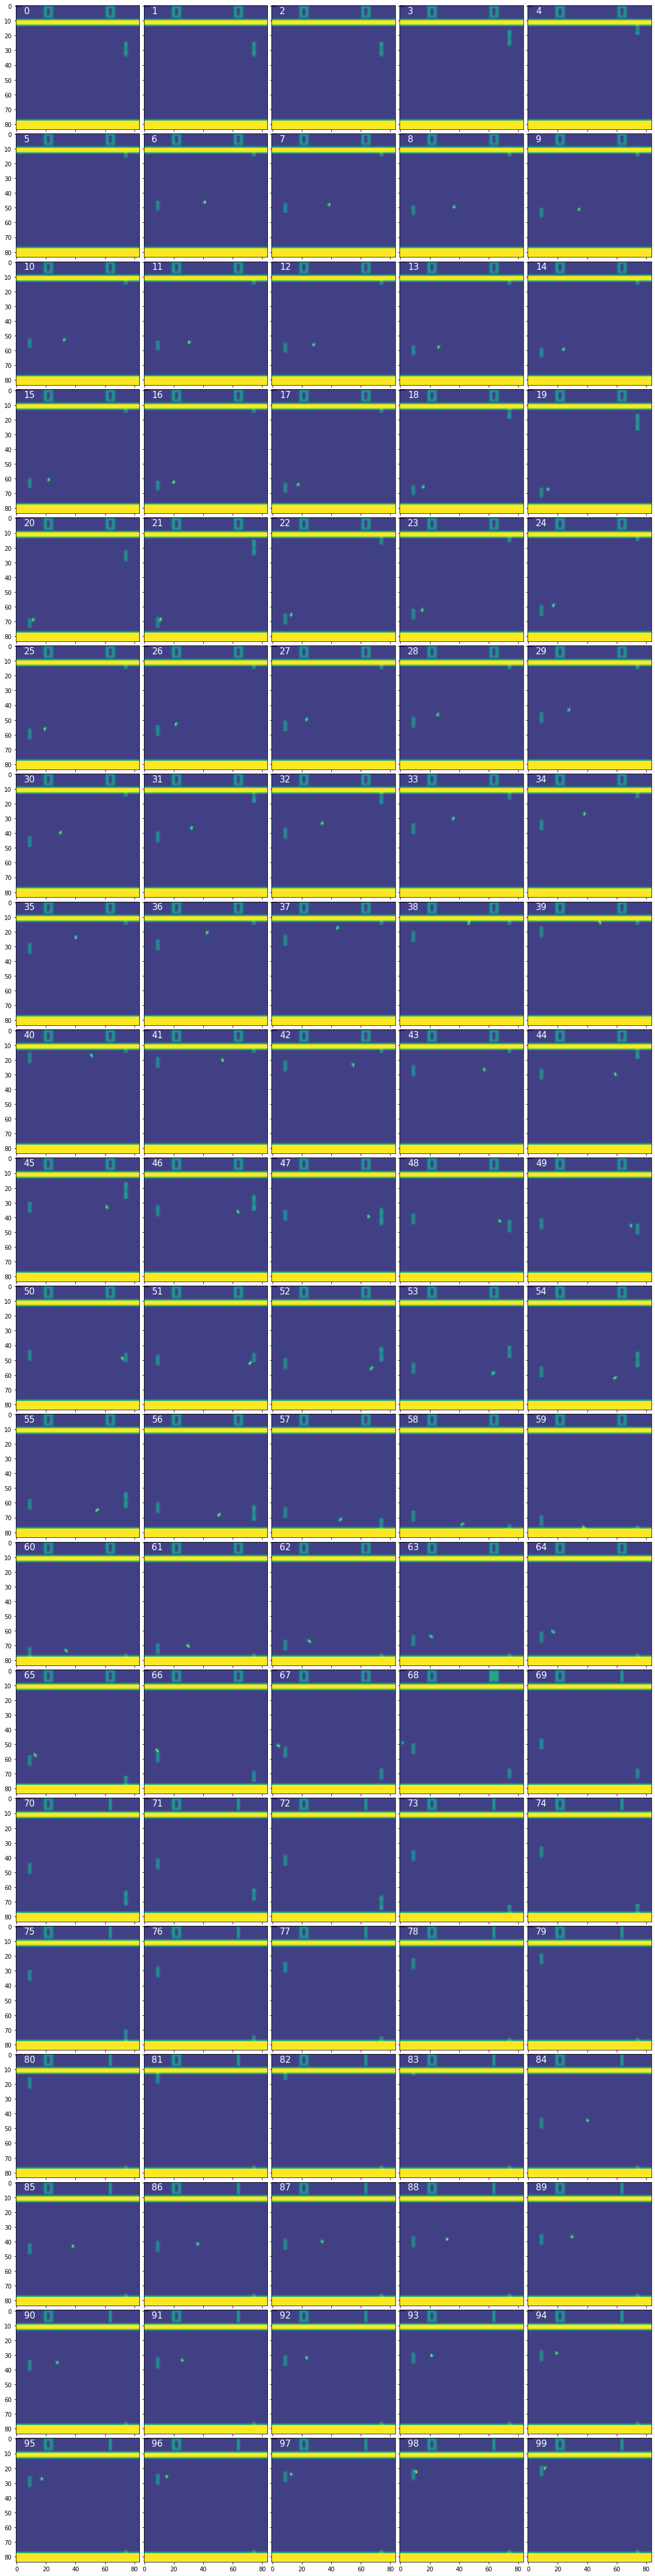

In [37]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(80., 80.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(20, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for i, (ax, im) in enumerate(zip(grid[:100], obs[:100])):
    # Iterating over the grid returns the Axes.
    ax.imshow(im[...,0])
    ax.text(5, 5, '{}'.format(i), size=15, color='white')
    
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
#fig.tight_layout()

#for i, ax in enumerate(axes.flat):
#    ax.imshow(obs[i][:,:,0])

## Load Qs

In [3]:
#print(os.getcwd())
# Load q values
with open("data/qs/qs_pong4nf_orig_t1000000_r20.0.pkl", "rb") as f:
    qs_pong = [pickle.load(f) for _ in range(pickle.load(f))]
    qs_pong_end_t = pickle.load(f)    
    
with open("data/qs/qs_pong4nf_ed1_t1300000_s18.5.pkl", "rb") as f:
    qs_pong_ed1 = [pickle.load(f) for _ in range(pickle.load(f))]
    qs_pong_ed1_end_t = pickle.load(f)  

with open("data/qs/qs_pong4nf_ed2__t800000__s18.0.pkl", "rb") as f:
    qs_pong_ed2 = [pickle.load(f) for _ in range(pickle.load(f))]
    qs_pong_ed2_end_t = pickle.load(f)  

## Exploration

### Individual Q-values

# Find explanations for actions here:
https://github.com/openai/atari-py/blob/master/doc/manual/manual.pdf

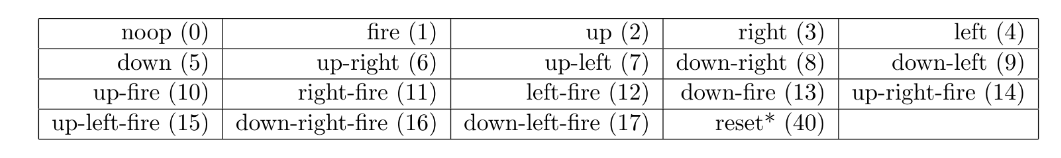

#### Over time

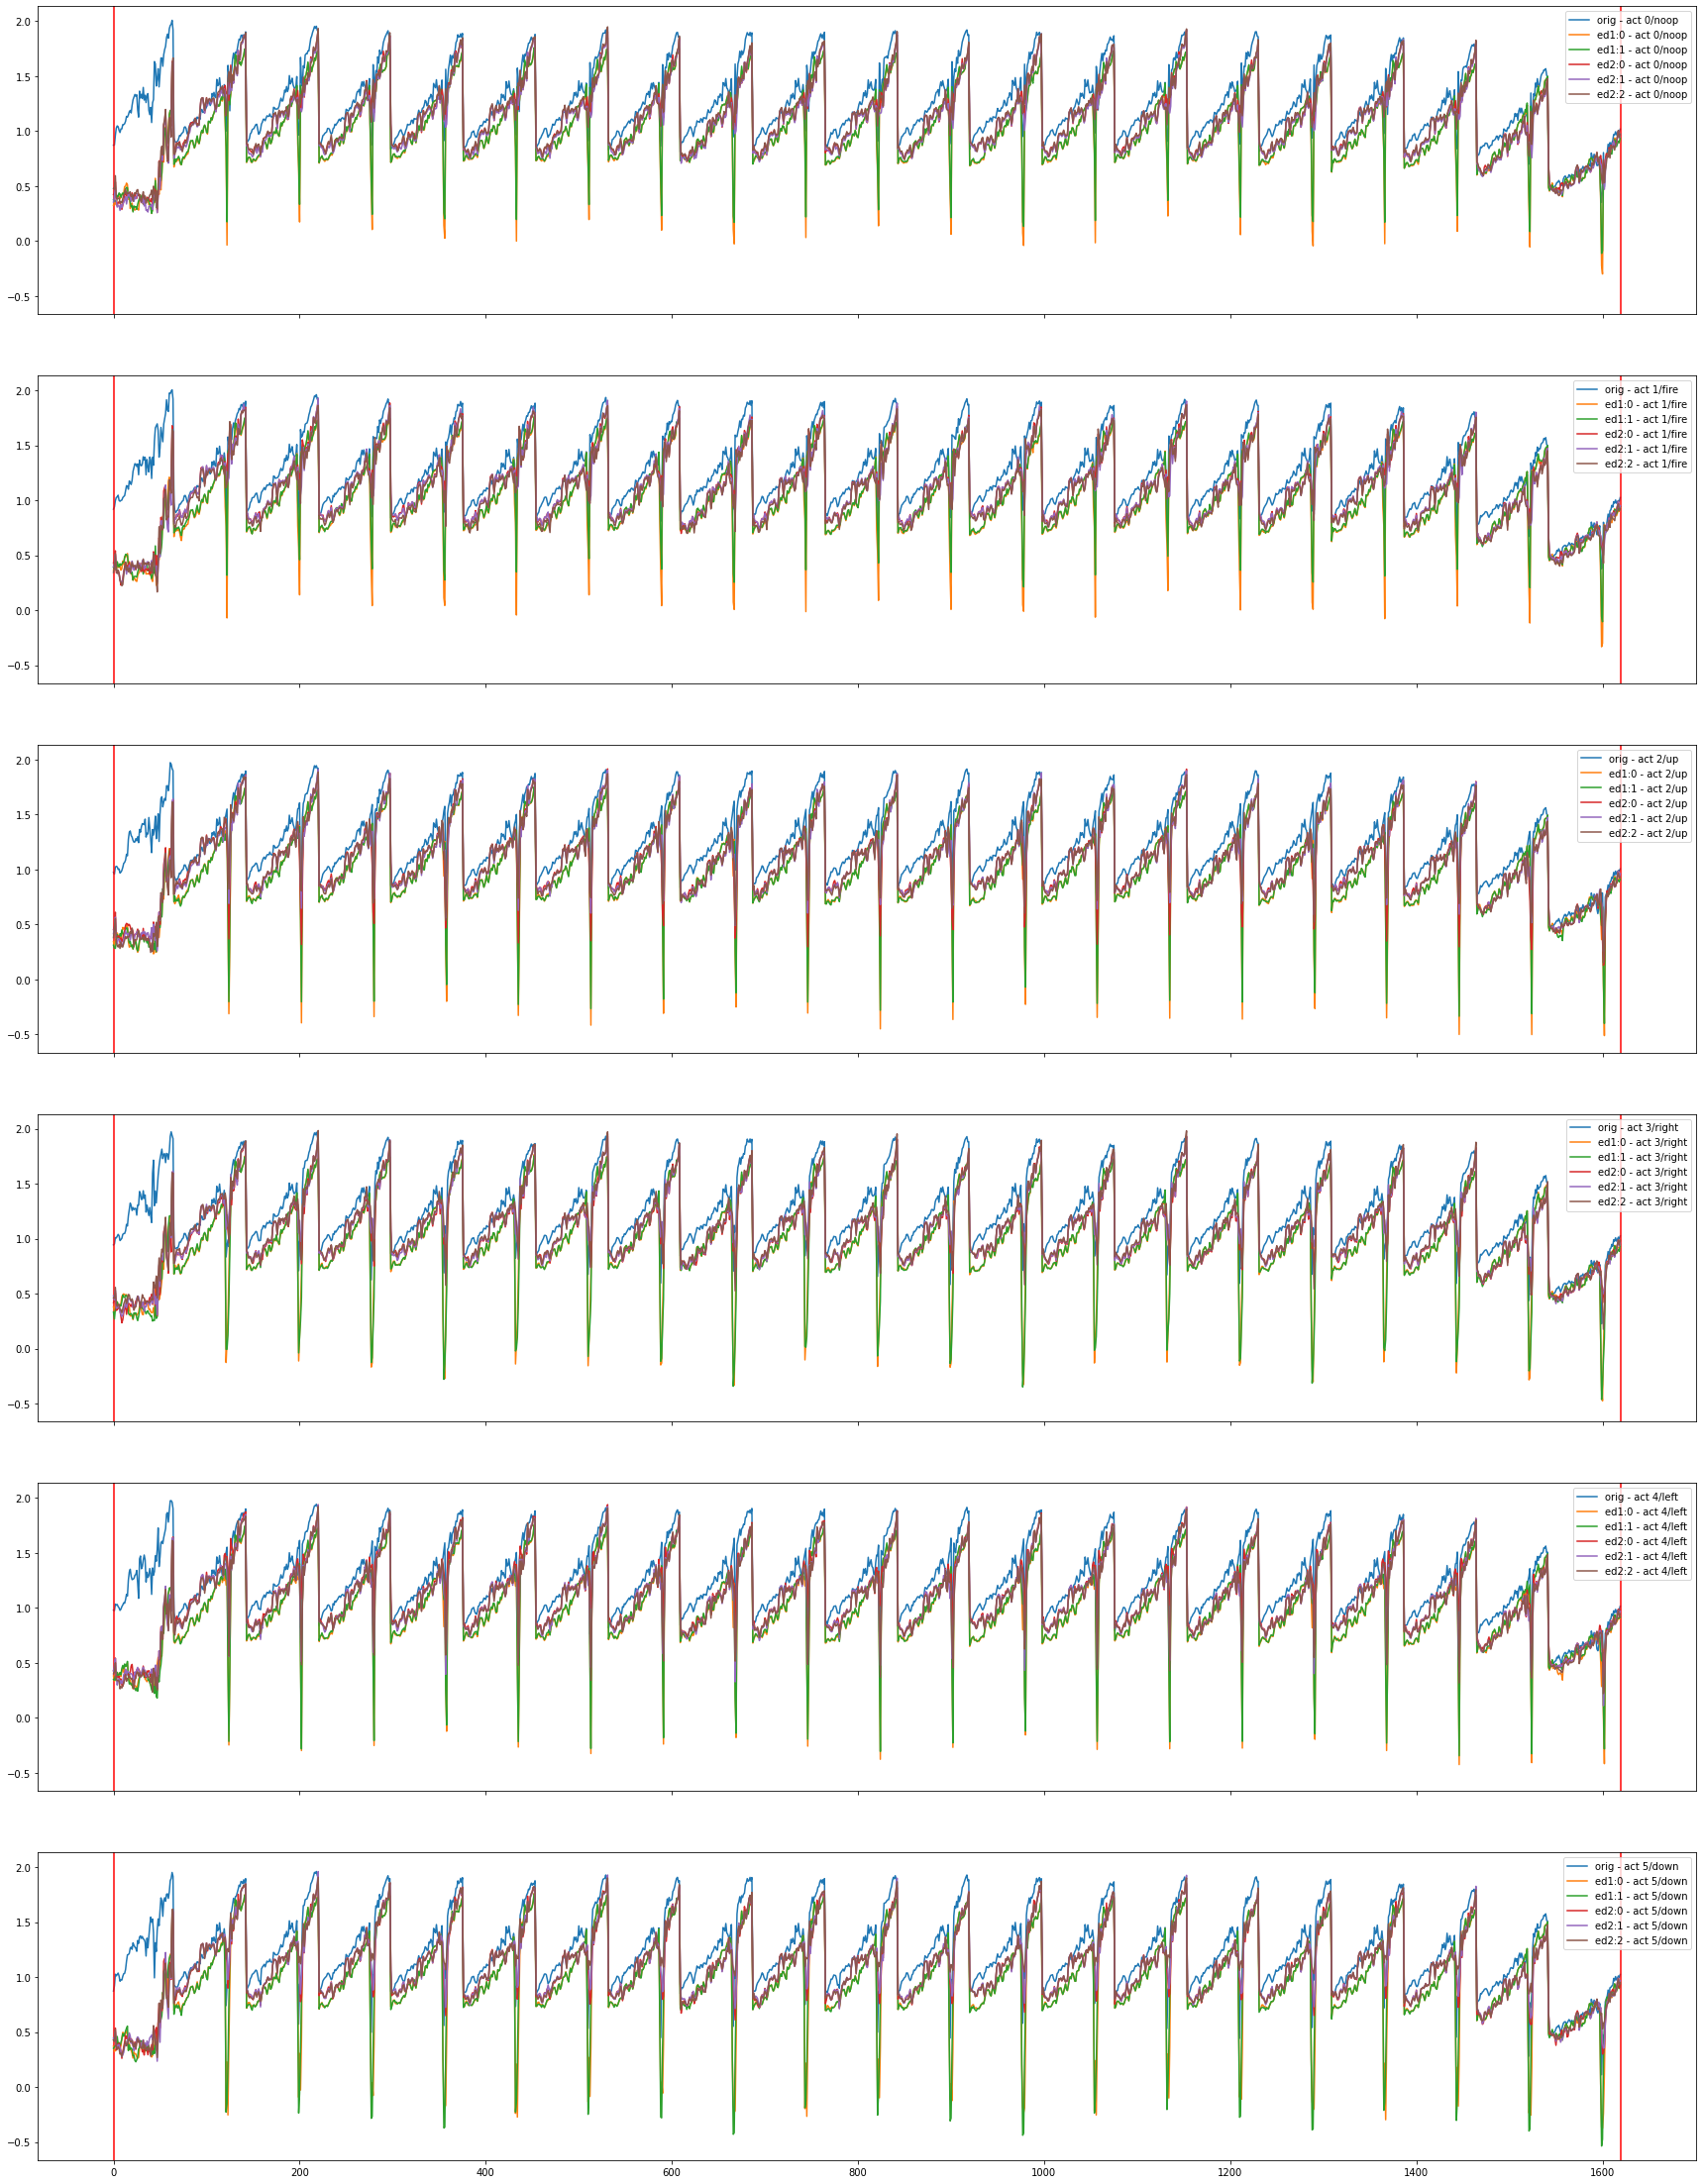

In [87]:
fig, axs = plt.subplots(nrows=6, figsize=(30, 40), sharex=True, sharey=True)
# print([qsp[0][0] for qsp in qs_pong])

act_str = ["noop", "fire", "up", "right", "left", "down"]

for i in range(6):
    axs[i].plot([qsp[0,i] for qsp in qs_pong[:qs_pong_end_t[0]]], label="orig - act {}/{}".format(i, act_str[i])) 
    axs[i].axvline(x=0, color="r")
    axs[i].axvline(x=qs_pong_end_t[0], color="r")

# ED 1
    
for i in range(6):
    axs[i].plot([qsp[0,i] for qsp in qs_pong_ed1[:qs_pong_end_t[0]]], 
                label="ed1:0 - act {}/{}".format(i%6, act_str[i%6])) 

for i in range(6,12):
    axs[i%6].plot([qsp[0,i] for qsp in qs_pong_ed1[:qs_pong_end_t[0]]], 
                  label="ed1:1 - act {}/{}".format(i%6, act_str[i%6])) 

# ED 2
    
for i in range(6):
    axs[i].plot([qsp[0,i] for qsp in qs_pong_ed2[:qs_pong_end_t[0]]], 
                label="ed2:0 - act {}/{}".format(i%6, act_str[i%6])) 

for i in range(6,12):
    axs[i%6].plot([qsp[0,i] for qsp in qs_pong_ed2[:qs_pong_end_t[0]]], 
                  label="ed2:1 - act {}/{}".format(i%6, act_str[i%6])) 
    
for i in range(12,18):
    axs[i%6].plot([qsp[0,i] for qsp in qs_pong_ed2[:qs_pong_end_t[0]]], 
                  label="ed2:2 - act {}/{}".format(i%6, act_str[i%6])) 

for i in range(6):
    axs[i].legend()
    
#for x in qs_pong_end_t:
#    axs[0].axvline(x=x, color="r")

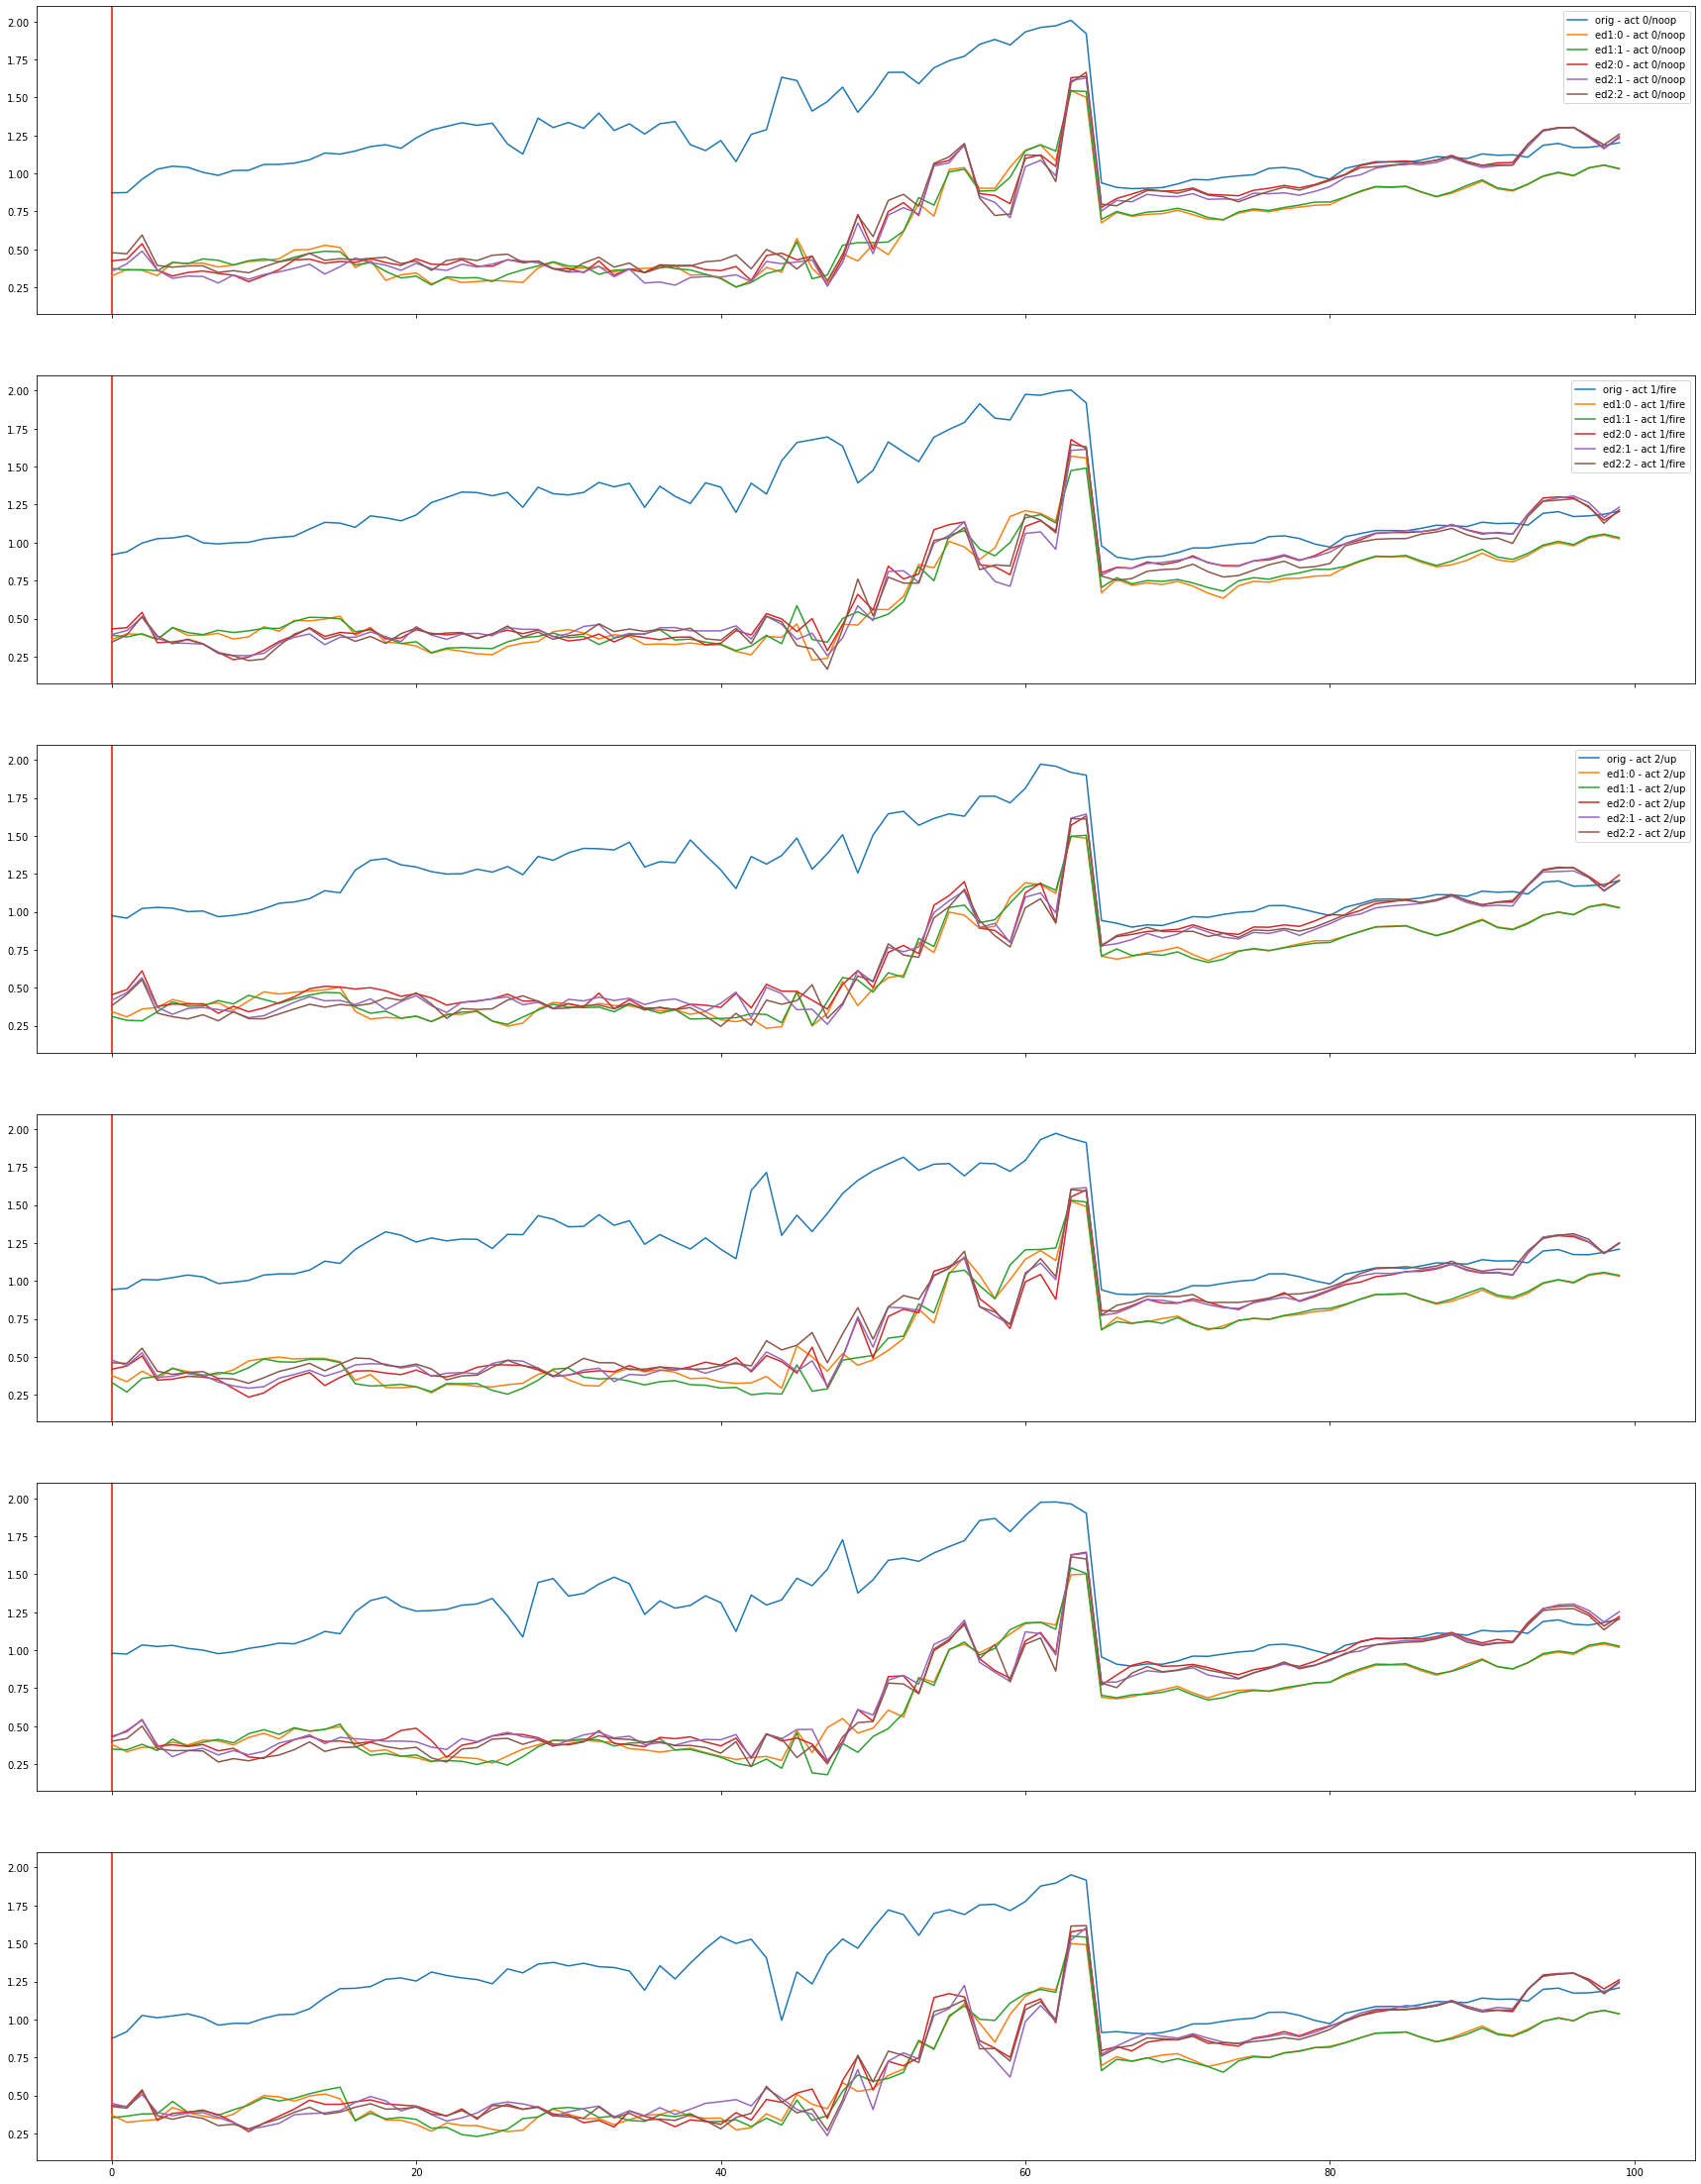

In [92]:
# Closeup

fig, axs = plt.subplots(nrows=6, figsize=(30, 40), sharex=True, sharey=True)
xw = 100

for i in range(6):
    axs[i].plot([qsp[0,i] for qsp in qs_pong[:xw]], label="orig - act {}/{}".format(i, act_str[i])) 
    axs[i].axvline(x=0, color="r")
    #axs[i].axvline(x=qs_pong_end_t[0], color="r")

# ED 1
    
for i in range(6):
    axs[i].plot([qsp[0,i] for qsp in qs_pong_ed1[:xw]], label="ed1:0 - act {}/{}".format(i, act_str[i])) 

for i in range(6,12):
    axs[i%6].plot([qsp[0,i] for qsp in qs_pong_ed1[:xw]], label="ed1:1 - act {}/{}".format(i%6, act_str[i%6])) 

# ED 2
    
for i in range(6):
    axs[i].plot([qsp[0,i] for qsp in qs_pong_ed2[:xw]], label="ed2:0 - act {}/{}".format(i, act_str[i])) 

for i in range(6,12):
    axs[i%6].plot([qsp[0,i] for qsp in qs_pong_ed2[:xw]], label="ed2:1 - act {}/{}".format(i%6, act_str[i%6])) 
    
for i in range(12,18):
    axs[i%6].plot([qsp[0,i] for qsp in qs_pong_ed2[:xw]], label="ed2:2 - act {}/{}".format(i%6, act_str[i%6])) 
    


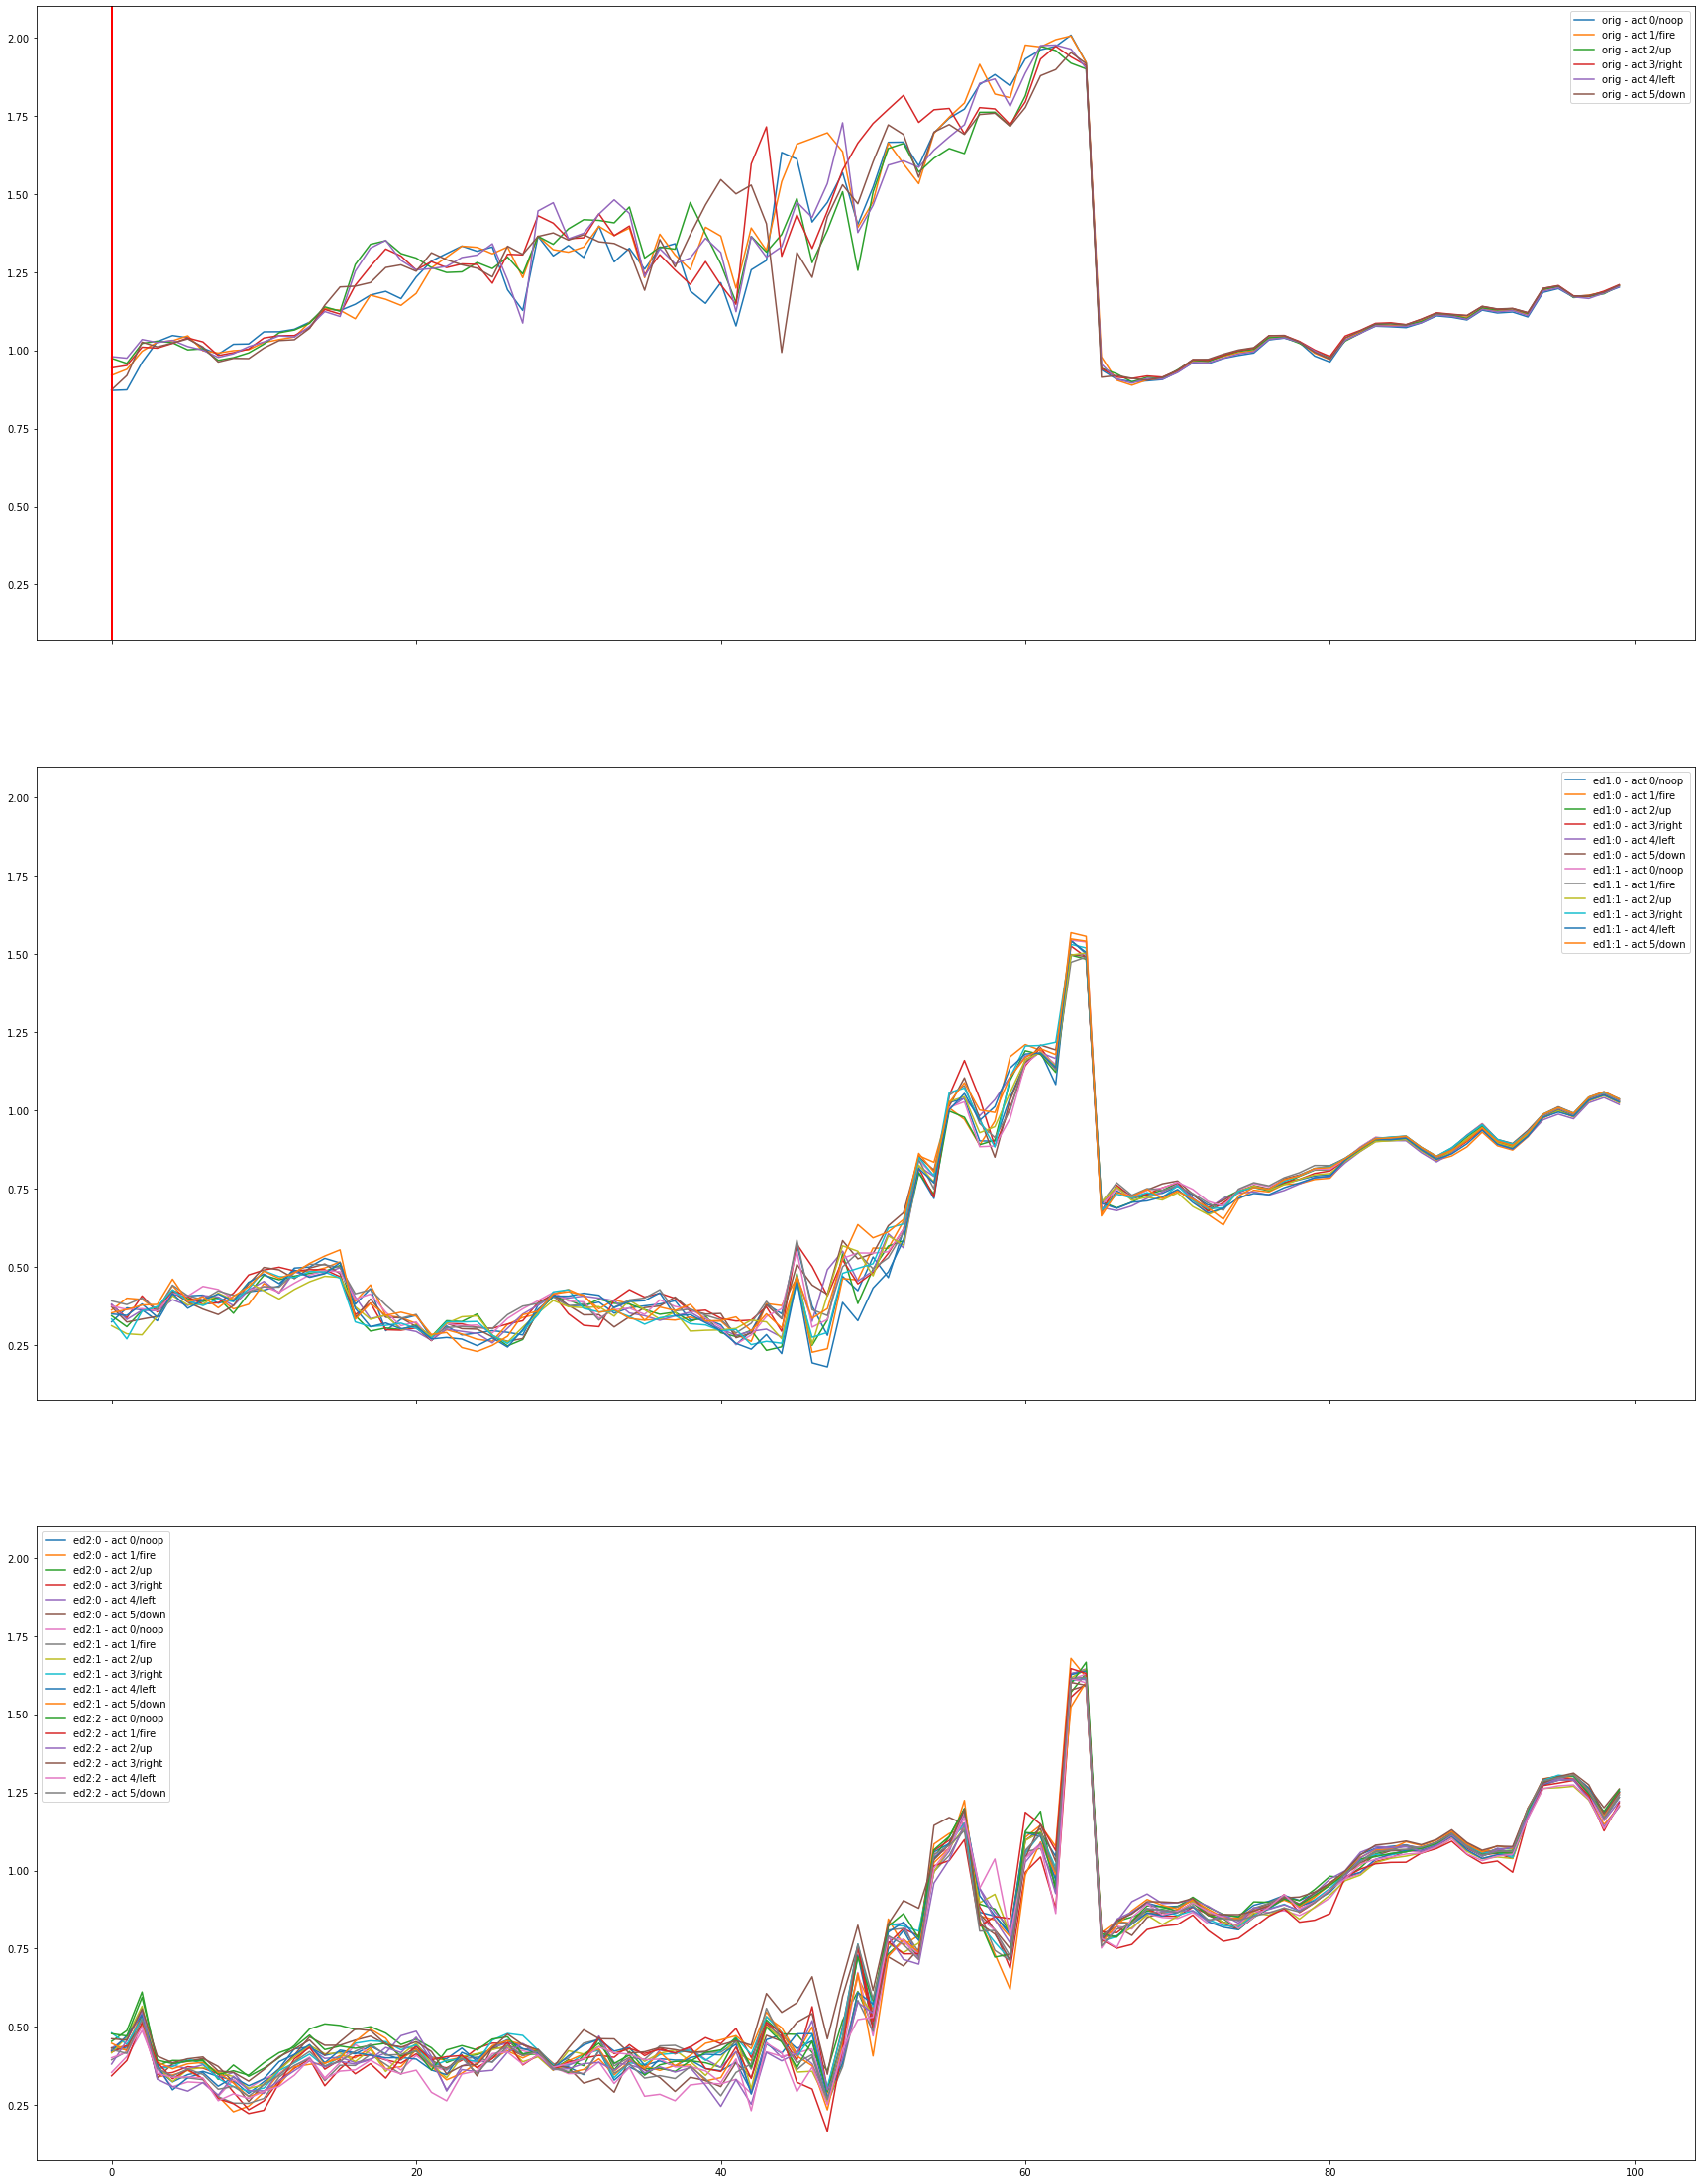

In [94]:
fig, axs = plt.subplots(nrows=3, figsize=(30, 40), sharex=True, sharey=True)
xw = 100

for i in range(6):
    axs[0].plot([qsp[0,i] for qsp in qs_pong[:xw]], label="orig - act {}/{}".format(i, act_str[i])) 
    axs[0].axvline(x=0, color="r")

# ED 1
    
for i in range(6):
    axs[1].plot([qsp[0,i] for qsp in qs_pong_ed1[:xw]], label="ed1:0 - act {}/{}".format(i, act_str[i])) 

for i in range(6,12):
    axs[1].plot([qsp[0,i] for qsp in qs_pong_ed1[:xw]], label="ed1:1 - act {}/{}".format(i%6, act_str[i%6])) 

# ED 2
    
for i in range(6):
    axs[2].plot([qsp[0,i] for qsp in qs_pong_ed2[:xw]], label="ed2:0 - act {}/{}".format(i, act_str[i])) 

for i in range(6,12):
    axs[2].plot([qsp[0,i] for qsp in qs_pong_ed2[:xw]], label="ed2:1 - act {}/{}".format(i%6, act_str[i%6])) 
    6
for i in range(12,18):
    axs[2].plot([qsp[0,i] for qsp in qs_pong_ed2[:xw]], label="ed2:2 - act {}/{}".format(i%6, act_str[i%6])) 
    
for i in range(3):
    axs[i].legend()

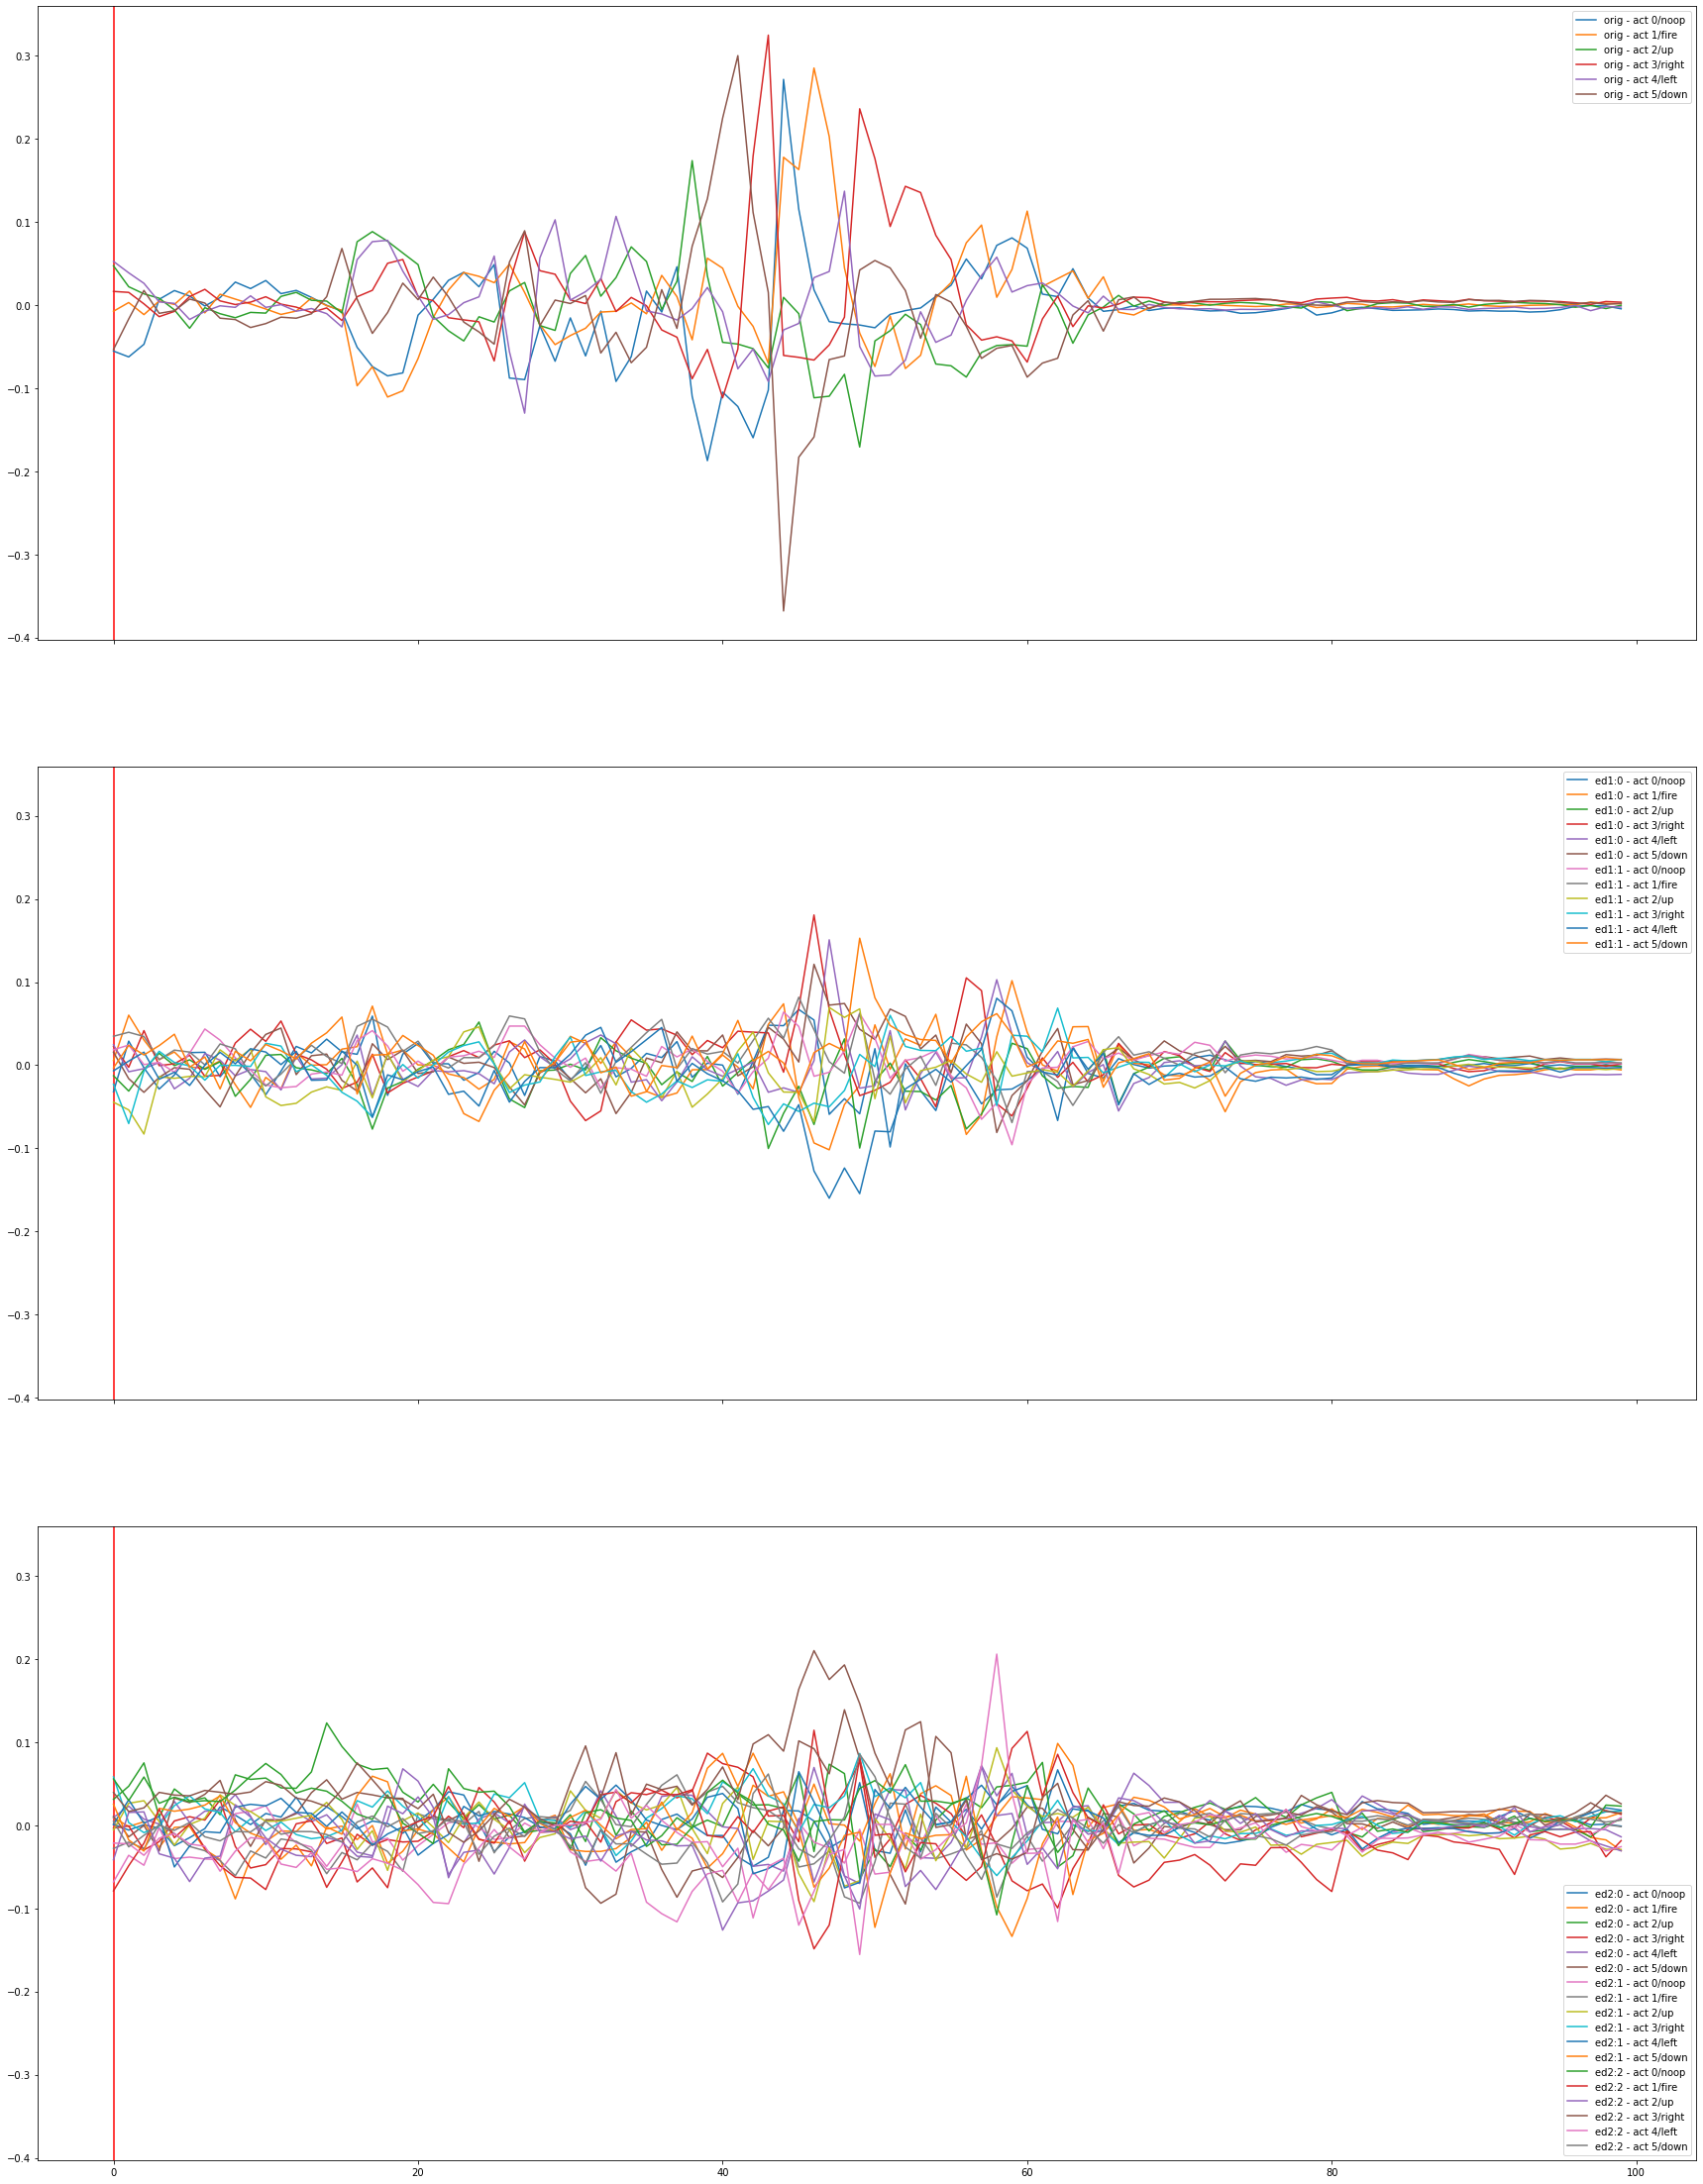

In [100]:
# demean!

qs_pong_mean = [q.mean() for q in qs_pong]
qs_pong_ed1_mean = [q.mean() for q in qs_pong_ed1]
qs_pong_ed2_mean = [q.mean() for q in qs_pong_ed2]

fig, axs = plt.subplots(nrows=3, figsize=(30, 40), sharex=True, sharey=True)
xw = 100

axs[0].axvline(x=0, color="r")
axs[1].axvline(x=0, color="r")
axs[2].axvline(x=0, color="r")


for i in range(6):
    axs[0].plot([qsp[0,i]-m for qsp,m in zip(qs_pong[:xw],qs_pong_mean)], label="orig - act {}/{}".format(i, act_str[i])) 

# ED 1
    
for i in range(6):
    axs[1].plot([qsp[0,i]-m for qsp,m in zip(qs_pong_ed1[:xw],qs_pong_ed1_mean)], label="ed1:0 - act {}/{}".format(i, act_str[i])) 
    
for i in range(6,12):
    axs[1].plot([qsp[0,i]-m for qsp,m in zip(qs_pong_ed1[:xw],qs_pong_ed1_mean)], label="ed1:1 - act {}/{}".format(i%6, act_str[i%6])) 

# ED 2
    
for i in range(6):
    axs[2].plot([qsp[0,i]-m for qsp,m in zip(qs_pong_ed2[:xw],qs_pong_ed2_mean)], label="ed2:0 - act {}/{}".format(i, act_str[i])) 

for i in range(6,12):
    axs[2].plot([qsp[0,i]-m for qsp,m in zip(qs_pong_ed2[:xw],qs_pong_ed2_mean)], label="ed2:1 - act {}/{}".format(i%6, act_str[i%6])) 
    6
for i in range(12,18):
    axs[2].plot([qsp[0,i]-m for qsp,m in zip(qs_pong_ed2[:xw],qs_pong_ed2_mean)], label="ed2:2 - act {}/{}".format(i%6, act_str[i%6])) 
    
for i in range(3):
    axs[i].legend()

#### Mean comparison

### Histograms and effect of softmax temperature

In [22]:
qs_entropy_01 = [softmax_entropy(th.Tensor(q), beta=0.1, dim=1) for q in qs_pong]
qs_entropy_1 = [softmax_entropy(th.Tensor(q), beta=1.0, dim=1) for q in qs_pong]
qs_entropy_10 = [softmax_entropy(th.Tensor(q), beta=10.0, dim=1) for q in qs_pong]
qs_entropy_100 = [softmax_entropy(th.Tensor(q), beta=100.0, dim=1) for q in qs_pong]
                  
qs_ed1_entropy_01 = [softmax_entropy(th.Tensor(q), beta=0.1, dim=1) for q in qs_pong_ed1]
qs_ed1_entropy_1 = [softmax_entropy(th.Tensor(q), beta=1.0, dim=1) for q in qs_pong_ed1]
qs_ed1_entropy_10 = [softmax_entropy(th.Tensor(q), beta=10.0, dim=1) for q in qs_pong_ed1]
qs_ed1_entropy_100 = [softmax_entropy(th.Tensor(q), beta=100.0, dim=1) for q in qs_pong_ed1]
                  
qs_ed2_entropy_01 = [softmax_entropy(th.Tensor(q), beta=0.1, dim=1) for q in qs_pong_ed2]
qs_ed2_entropy_1 = [softmax_entropy(th.Tensor(q), beta=1.0, dim=1) for q in qs_pong_ed2]
qs_ed2_entropy_10 = [softmax_entropy(th.Tensor(q), beta=10.0, dim=1) for q in qs_pong_ed2]
qs_ed2_entropy_100 = [softmax_entropy(th.Tensor(q), beta=100.0, dim=1) for q in qs_pong_ed2]

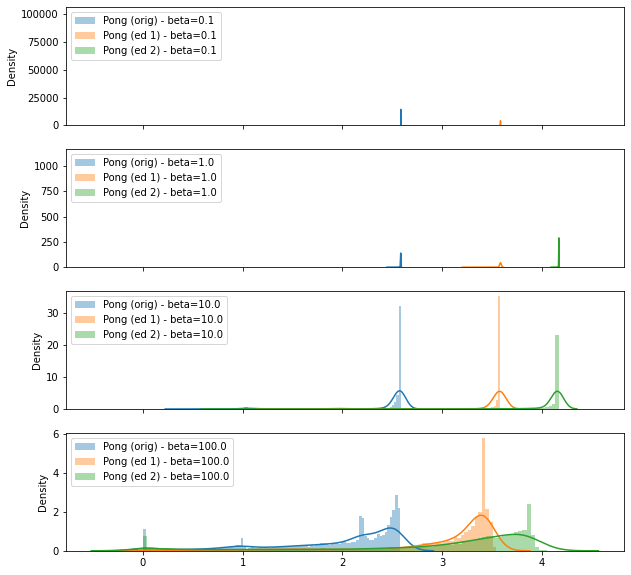

In [30]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 10), sharex=True, sharey=False)

ax = sns.distplot(qs_entropy_01, bins=100, ax=axs[0], label="Pong (orig) - beta=0.1")
ax1 = sns.distplot(qs_entropy_1, bins=100, ax=axs[1], label="Pong (orig) - beta=1.0")
ax2 = sns.distplot(qs_entropy_10, bins=100, ax=axs[2], label="Pong (orig) - beta=10.0")
ax3 = sns.distplot(qs_entropy_100, bins=100, ax=axs[3], label="Pong (orig) - beta=100.0")

ax = sns.distplot(qs_ed1_entropy_01, bins=100, ax=axs[0], label="Pong (ed 1) - beta=0.1")
ax1 = sns.distplot(qs_ed1_entropy_1, bins=100, ax=axs[1], label="Pong (ed 1) - beta=1.0")
ax2 = sns.distplot(qs_ed1_entropy_10, bins=100, ax=axs[2], label="Pong (ed 1) - beta=10.0")
ax3 = sns.distplot(qs_ed1_entropy_100, bins=100, ax=axs[3], label="Pong (ed 1) - beta=100.0")

ax = sns.distplot(qs_ed2_entropy_01, bins=100, ax=axs[0], label="Pong (ed 2) - beta=0.1")
ax1 = sns.distplot(qs_ed2_entropy_1, bins=100, ax=axs[1], label="Pong (ed 2) - beta=1.0")
ax2 = sns.distplot(qs_ed2_entropy_10, bins=100, ax=axs[2], label="Pong (ed 2) - beta=10.0")
ax3 = sns.distplot(qs_ed2_entropy_100, bins=100, ax=axs[3], label="Pong (ed 2) - beta=100.0")

ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()

### Correlation between Entropies

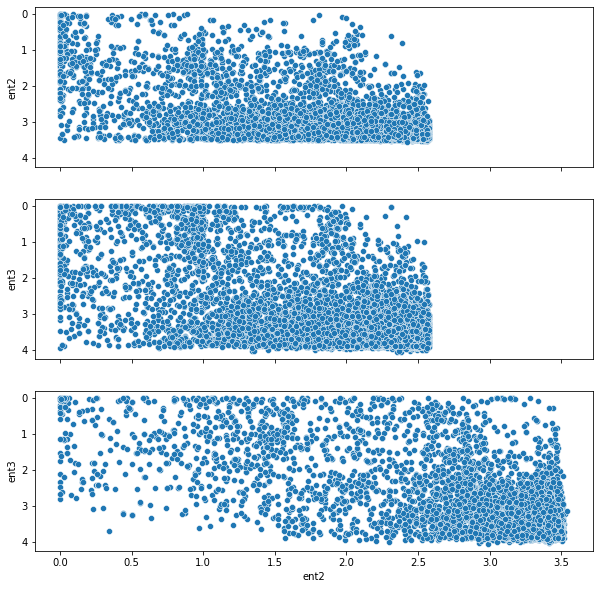

In [41]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 10), sharex=True, sharey=True)
data_entropy = pd.DataFrame.from_dict({"ent1":qs_entropy_100,
                                       "ent2":qs_ed1_entropy_100,
                                       "ent3":qs_ed2_entropy_100})
#sns.pairplot(data=data_entropy)
sns.scatterplot(data=data_entropy, x=data_entropy["ent1"], y=data_entropy["ent2"], ax=axs[0])
sns.scatterplot(data=data_entropy, x=data_entropy["ent1"], y=data_entropy["ent3"], ax=axs[1])
sns.scatterplot(data=data_entropy, x=data_entropy["ent2"], y=data_entropy["ent3"], ax=axs[2])

## Pong v4 NoFrameSkip, original action space

In [20]:
qs_pong_arr = th.stack([th.Tensor(q) for q in qs_pong])
print(qs_pong_arr[1])

tensor([[0.8738, 0.9392, 0.9583, 0.9514, 0.9750, 0.9195]])


AxesSubplot(0.125,0.125;0.775x0.755)


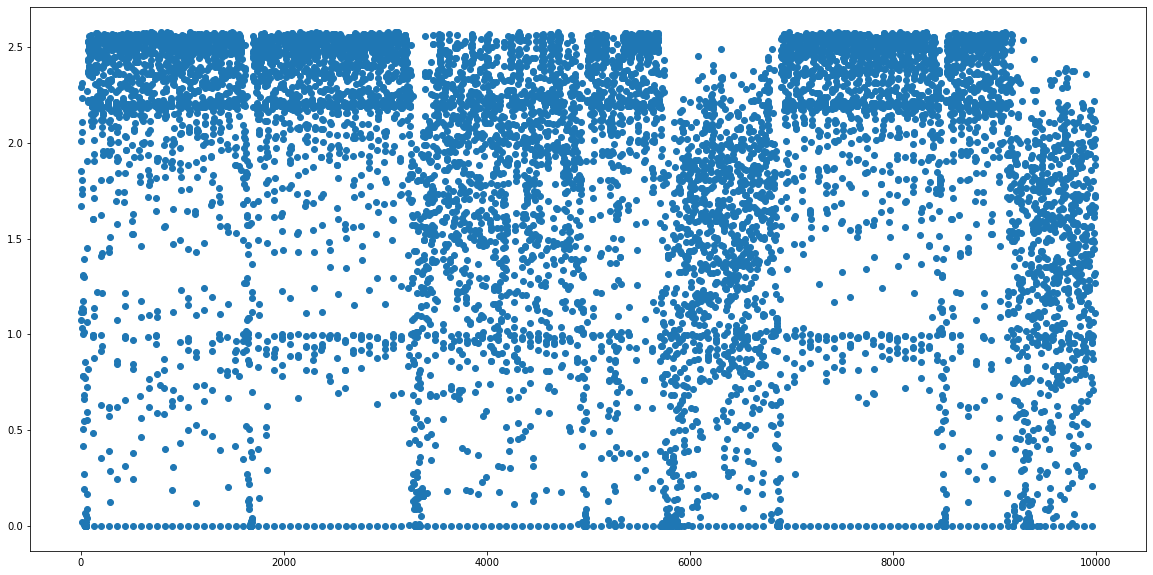

In [117]:
fig, axs = plt.subplots(nrows=1, figsize=(20, 10))
print(axs)
#print(qs_entropy_100)
axs.scatter(x=np.arange(len(qs_entropy_100)), y=np.array([q.item() for q in qs_entropy_100]))
#sns.jointplot(data={"i":list(range(len(qs_entropy_100))), "h":qs_entropy_100}, x="i", y="h", ax=axs)

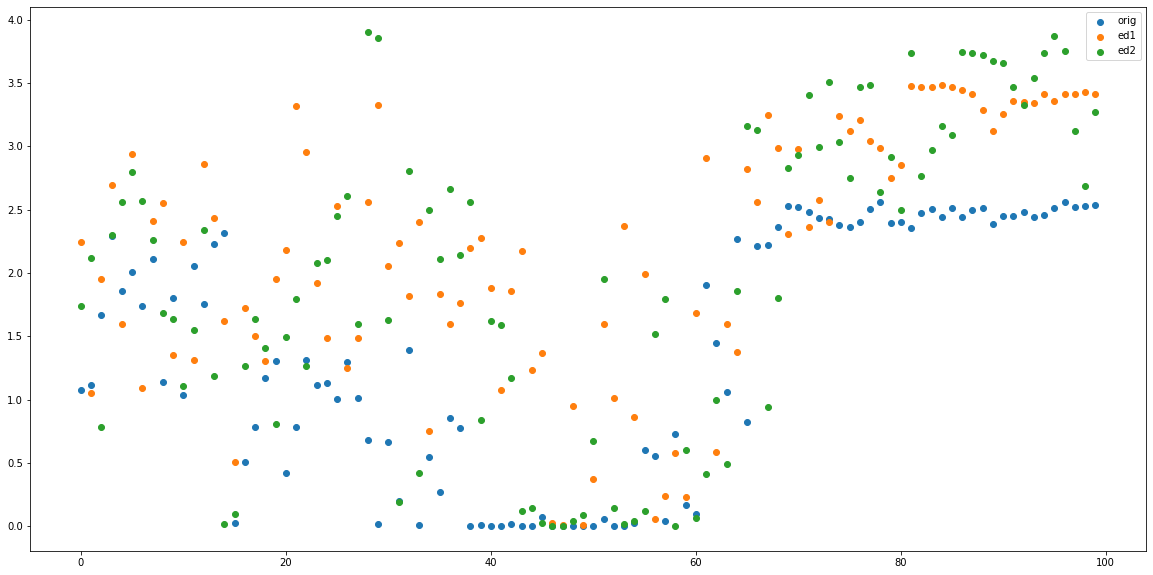

In [120]:
fig, axs = plt.subplots(nrows=1, figsize=(20, 10))
xw=100
axs.scatter(x=np.arange(len(qs_entropy_100[:xw])), y=np.array([q.item() for q in qs_entropy_100[:xw]]), label="orig")
axs.scatter(x=np.arange(len(qs_ed1_entropy_100[:xw])), y=np.array([q.item() for q in qs_ed1_entropy_100[:xw]]), label="ed1")
axs.scatter(x=np.arange(len(qs_ed2_entropy_100[:xw])), y=np.array([q.item() for q in qs_ed2_entropy_100[:xw]]), label="ed2")
axs.legend()

In [ ]:
# TODO: AVERAGE PLOT Entropy across different action spaces
# TODO: SCATTER PLOTS VS action space q values